In [1]:
import re
import gzip
import json
import time
import spacy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from termcolor import colored




pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

In [2]:
# !pip install spacy

In [2]:
def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield json.loads(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')


grocery_df=getDF("F:/abhi/deep learning/materials/reviews data/reviews_Grocery_and_Gourmet_Food_5.json.gz")
office_df=getDF("F:/abhi/deep learning/materials/reviews data/reviews_Office_Products_5.json.gz")
beauty_df=getDF("F:/abhi/deep learning/materials/reviews data/reviews_Beauty_5.json.gz")
toy_df=getDF("F:/abhi/deep learning/materials/reviews data/reviews_Toys_and_Games_5.json.gz")
pet_df=getDF("F:/abhi/deep learning/materials/reviews data/reviews_Pet_Supplies_5.json.gz")

In [3]:
grocery_df.head(2)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A1VEELTKS8NLZB,616719923X,Amazon Customer,"[0, 0]",Just another flavor of Kit Kat but the taste is unique and a bit different. The only thing that is bothersome is the price. I thought it was a bit expensive....,4.0,Good Taste,1370044800,"06 1, 2013"
1,A14R9XMZVJ6INB,616719923X,amf0001,"[0, 1]","I bought this on impulse and it comes from Japan, which amused my family, all those weird stamps and markings on the package. So that was fun. It said it would take about a month to arrive and it did take that long. I was hoping for a more interesting taste but to our family, it just tasted a bit less flavorful or weaker than the standard milk chocolate kit kat. The green tea flavor was too subtle for the sugar and it just tasted sweet. The wafers were very crispy, and that was good, but it tasted a bit anemic to us.I'm happy I bought it, but don't need to buy it again.",3.0,"3.5 stars, sadly not as wonderful as I had hoped",1400457600,"05 19, 2014"


In [4]:
grocery_df=grocery_df[["reviewText","overall"]]
grocery_df["category"]="food"
# print(grocery_df.head(1))

office_df=office_df[["reviewText","overall"]]
office_df["category"]="office"

# print(office_df.head(1))

beauty_df=beauty_df[["reviewText","overall"]]
beauty_df["category"]="beauty"

# print(beauty_df.head(1))

toy_df=toy_df[["reviewText","overall"]]
toy_df["category"]="games"
# print(toy_df.head(1))


pet_df=pet_df[["reviewText","overall"]]
pet_df["category"]="petsupplies"
# # print(pet_df.head(1))

In [5]:
grocery_df.iloc[0]

reviewText    Just another flavor of Kit Kat but the taste is unique and a bit different.  The only thing that is bothersome is the price.  I thought it was a bit expensive....
overall       4                                                                                                                                                                 
category      food                                                                                                                                                              
Name: 0, dtype: object

In [6]:
data=pd.concat([grocery_df,office_df,beauty_df,toy_df,pet_df])

In [7]:
data.head(2)

,reviewText,overall,category
0,Just another flavor of Kit Kat but the taste is unique and a bit different. The only thing that is bothersome is the price. I thought it was a bit expensive....,4.0,food
1,"I bought this on impulse and it comes from Japan, which amused my family, all those weird stamps and markings on the package. So that was fun. It said it would take about a month to arrive and it did take that long. I was hoping for a more interesting taste but to our family, it just tasted a bit less flavorful or weaker than the standard milk chocolate kit kat. The green tea flavor was too subtle for the sugar and it just tasted sweet. The wafers were very crispy, and that was good, but it tasted a bit anemic to us.I'm happy I bought it, but don't need to buy it again.",3.0,food


In [8]:
data["category"].dropna(inplace=True)
data.drop_duplicates(inplace=True)

In [9]:
data.head(2)

,reviewText,overall,category
0,Just another flavor of Kit Kat but the taste is unique and a bit different. The only thing that is bothersome is the price. I thought it was a bit expensive....,4.0,food
1,"I bought this on impulse and it comes from Japan, which amused my family, all those weird stamps and markings on the package. So that was fun. It said it would take about a month to arrive and it did take that long. I was hoping for a more interesting taste but to our family, it just tasted a bit less flavorful or weaker than the standard milk chocolate kit kat. The green tea flavor was too subtle for the sugar and it just tasted sweet. The wafers were very crispy, and that was good, but it tasted a bit anemic to us.I'm happy I bought it, but don't need to buy it again.",3.0,food


In [10]:
data=data.groupby("category").head(10000)

In [11]:
data["category"].value_counts()

petsupplies    10000
food           10000
games          10000
beauty         10000
office         10000
Name: category, dtype: int64

In [12]:
len(data)

50000

# Data Cleaning

In [13]:
import string
from nltk.tokenize import word_tokenize as tokenize
from nltk.corpus import stopwords
stop_words=stopwords.words('english')

In [14]:
def clean(text):
    text=text.lower()
    url_removed=re.sub(r'https\S+','',text,flags=re.MULTILINE)
    text=re.sub("[^a-zA-Z]"," ",url_removed)
    text=re.sub("\.+"," ",text)
    word_tokens=tokenize(text)
    text=[word for word in word_tokens if word  not in stop_words]
    text=[word for word in text if word not in string.punctuation]
    return " ".join(text)

In [15]:
clean("This is  good day . ! ! , I IS  #")

'good day'

In [16]:
check=data["reviewText"].iloc[0]

In [17]:
print("original sentence \n",check)


original sentence 
 Just another flavor of Kit Kat but the taste is unique and a bit different.  The only thing that is bothersome is the price.  I thought it was a bit expensive....


In [18]:
print("cleaned sentence:\n",clean(check))

cleaned sentence:
 another flavor kit kat taste unique bit different thing bothersome price thought bit expensive


In [19]:
data["cleaned_text"]=data["reviewText"].apply(lambda x:clean(x))

In [20]:
category_labels={"petsupplies":0,"beauty":1,"games":2,"food":3,"office":4}
data["label"]=data["category"].map(category_labels)

In [21]:
data["category"].value_counts()

petsupplies    10000
food           10000
games          10000
beauty         10000
office         10000
Name: category, dtype: int64

In [22]:
data.dropna(inplace=True)

In [23]:
data["category"].value_counts()

petsupplies    10000
food           10000
games          10000
beauty         10000
office         10000
Name: category, dtype: int64

In [24]:
data["label"]=data["label"].astype(int)

In [25]:
data.head(2)

,reviewText,overall,category,cleaned_text,label
0,Just another flavor of Kit Kat but the taste is unique and a bit different. The only thing that is bothersome is the price. I thought it was a bit expensive....,4.0,food,another flavor kit kat taste unique bit different thing bothersome price thought bit expensive,3
1,"I bought this on impulse and it comes from Japan, which amused my family, all those weird stamps and markings on the package. So that was fun. It said it would take about a month to arrive and it did take that long. I was hoping for a more interesting taste but to our family, it just tasted a bit less flavorful or weaker than the standard milk chocolate kit kat. The green tea flavor was too subtle for the sugar and it just tasted sweet. The wafers were very crispy, and that was good, but it tasted a bit anemic to us.I'm happy I bought it, but don't need to buy it again.",3.0,food,bought impulse comes japan amused family weird stamps markings package fun said would take month arrive take long hoping interesting taste family tasted bit less flavorful weaker standard milk chocolate kit kat green tea flavor subtle sugar tasted sweet wafers crispy good tasted bit anemic us happy bought need buy,3


In [26]:
data["label"].value_counts()

4    10000
3    10000
2    10000
1    10000
0    10000
Name: label, dtype: int64

In [27]:
train_samples_class_0=data[data["label"]==0][:9000]
train_samples_class_1=data[data["label"]==1][:9000]
train_samples_class_2=data[data["label"]==2][:9000]
train_samples_class_3=data[data["label"]==3][:9000]
train_samples_class_4=data[data["label"]==4][:9000]




In [28]:
train=pd.concat([train_samples_class_0,train_samples_class_1,train_samples_class_2,train_samples_class_3,train_samples_class_4])

In [29]:
len(train)

45000

In [30]:
train=train.sample(frac=1.0)

In [31]:
test_samples_class_0=data[data["label"]==0][9000:]
test_samples_class_1=data[data["label"]==1][9000:]
test_samples_class_2=data[data["label"]==2][9000:]
test_samples_class_3=data[data["label"]==3][9000:]
test_samples_class_4=data[data["label"]==4][9000:]


In [32]:
test=pd.concat([test_samples_class_0,test_samples_class_1,test_samples_class_2,test_samples_class_3,test_samples_class_4])

In [33]:
test=test.sample(frac=1.0)

In [34]:
print("length of train",len(train))
print("length of test",len(test))

length of train 45000
length of test 5000


In [35]:
train.head(2)

,reviewText,overall,category,cleaned_text,label
5081,"I thought this would be a good polish from the reviews, but its not. I had to put on several coats and it still didn't look right. I love Essie polish just not this one.",2.0,beauty,thought would good polish reviews put several coats still look right love essie polish one,1
497,"I'm hopping mad just seeing this. We should all paws for a second, and lettuce think about this. Wouldn't you really just rather have a chicken? I'm all ears if someone disagrees.",2.0,food,hopping mad seeing paws second lettuce think really rather chicken ears someone disagrees,3


In [36]:
test.head(2)

,reviewText,overall,category,cleaned_text,label
9651,"This is a great shampoo + conditioner, I have two Scotties, their hair can get pretty tangled if not brushed regularly, once I wash them with this it does help! (I admit i also use the conditioner by the same brand) but the shampoo helps. I wasn't sure about the Lavender & Mint sent when I was ordering it, but I did like it! And the scent lingers for a while on my dog's hair (up to a week, granted they don't roll around in the dirt) I also like that it's not tested on animals.",5.0,beauty,great shampoo conditioner two scotties hair get pretty tangled brushed regularly wash help admit also use conditioner brand shampoo helps sure lavender mint sent ordering like scent lingers dog hair week granted roll around dirt also like tested animals,1
9841,"Flavorful bursts of cinnamon and dashes of licorice dance within this delicious tea.This tea is an excellent selection to relax with after a long day or a delectable way to inspire one's self as the sun rises.Drink Tea for Your HealthIngredients: Eleuthero, Peppermint, Cinnamon, Ginger, Chamomile, West Indian Lemongrass, Licorice, Catnip, Tilia Flowers, Natural Lemon Flavor with other natural flavors (contains Soy Lecithin), Hops, and Vitamin B6 and B12.EleutheroAs an adaptogenic herb, Eleuthero helps the body adapt to stress.PeppermintPrized for its multiple medicinal benefits, some of the ailment peppermint helps alleviate include digestive issues and fights stress.CinnamonHaving immune-boosting properties, cinnamon also aids the digestive system.GingerThis helpful herb can assist the digestive system and can sometimes prove beneficial for seasickness, morning sickness, and chemotherapy.ChamomileWith anti-inflammatory and antispasmodic properties, chamomile can be helpful for easing stomach and intestinal cramps.Serving suggestions: This herbal tea is delightfully when consumed warm, or when poured over ice. Drink by itself, or sweeten with sugar or honey, or splash with milk, creamer, almond milk, rice drink, or coconut milk, to add an additional depth to this already fully flavored tea.Celestial Seasoning Brews Up Teapots of Environment ResponsibilityCelestial Seasonings teas are packaged in completely compostable and biodegradable pillow-design tea bags without the need for a tag, string, staple, or individual wrapper. These unique tea bags are packed in boxes manufactured from 100% recyclable materials. Resulting in Celestial Seasonings' love for the earth and their innovative tea bags, they save three-and-a-half pounds of waste each year.Brew yourself a cup of Celestial Seasonings Herbal Tea Tension Tamer and experience the pure flavorful relaxation!Disclosure of Material Connection: I received this product free from Linhart P.R. I was not required to write a positive review. The opinions I have expressed are my own. I am disclosing this in accordance with the Federal Trade Commission's 16 CFR, Part 255vf: ""Guides Concerning the Use of Endorsements and Testimonials in Advertising.""",5.0,food,flavorful bursts cinnamon dashes licorice dance within delicious tea tea excellent selection relax long day delectable way inspire one self sun rises drink tea healthingredients eleuthero peppermint cinnamon ginger chamomile west indian lemongrass licorice catnip tilia flowers natural lemon flavor natural flavors contains soy lecithin hops vitamin b b eleutheroas adaptogenic herb eleuthero helps body adapt stress peppermintprized multiple medicinal benefits ailment peppermint helps alleviate include digestive issues fights stress cinnamonhaving immune boosting properties cinnamon also aids digestive system gingerthis helpful herb assist digestive system sometimes prove beneficial seasickness morning sickness chemotherapy chamomilewith anti inflammatory antispasmodic properties chamomile helpful easing stomach intestinal cramps serving suggestions herbal tea delightfully consumed warm poured ice drink sweeten sugar honey splash milk crea

In [37]:
X_train=np.array(train["cleaned_text"])
X_test=np.array(test["cleaned_text"])
y_train=np.array(train["label"])
y_test=np.array(test["label"])

In [38]:
X_train[0]

'thought would good polish reviews put several coats still look right love essie polish one'

In [39]:
y_train[0]

1

# Data Preprocessing

In [40]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import Sequential

### Tokenizer

In [41]:
tokenizer=Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

word_index=tokenizer.word_index

In [42]:
dict(list(word_index.items())[0:20])

{'<OOV>': 1,
 'like': 2,
 'one': 3,
 'use': 4,
 'great': 5,
 'good': 6,
 'product': 7,
 'get': 8,
 'game': 9,
 'would': 10,
 'well': 11,
 'really': 12,
 'time': 13,
 'love': 14,
 'also': 15,
 'much': 16,
 'little': 17,
 'used': 18,
 'skin': 19,
 'even': 20}

In [43]:
print(len(word_index))
vocab_size=len(word_index)+1
print(vocab_size)

45668
45669


In [100]:
data["len"]=data["cleaned_text"].apply(lambda x:len(x.split()))

(array([16622., 15255.,  7285.,  4022.,  2292.,  1378.,   954.,   634.,
          404.,   283.]),
 array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180., 200.]),
 <a list of 10 Patch objects>)

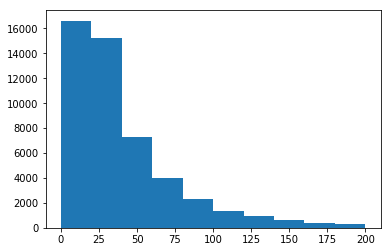

In [103]:
import matplotlib.pyplot as plt
plt.hist(data["len"],range=(0,200))

In [44]:
max_length=100
embedding_dim=300 # every word will have 300 values [0.....300]
trunc_type='post'
padding_type='post'


train_sequences=tokenizer.texts_to_sequences(X_train)
print(train_sequences[0])
print(len(train_sequences[0]))

[164, 10, 6, 774, 206, 46, 155, 1454, 26, 107, 91, 14, 3087, 774, 3]
15


In [49]:
test_sequences=tokenizer.texts_to_sequences(X_test)
print(test_sequences[0])

[5, 496, 609, 32, 1, 33, 8, 108, 3241, 3741, 1394, 351, 161, 1364, 15, 4, 609, 128, 496, 320, 88, 1806, 1895, 1014, 869, 2, 340, 5843, 73, 33, 274, 3085, 355, 72, 2019, 15, 2, 1564, 1362]


In [59]:
vocab=dict(list(word_index.items()))

In [65]:
X_test[0]

'great shampoo conditioner two scotties hair get pretty tangled brushed regularly wash help admit also use conditioner brand shampoo helps sure lavender mint sent ordering like scent lingers dog hair week granted roll around dirt also like tested animals'

In [ ]:
explain='great shampoo conditioner two scotties hair '
embed='[0.2,0.4,0.6,....until 300] [0.2,0.333,0.07,....until 300]'

In [61]:
vocab.get('great')

5

In [66]:
vocab.get('shampoo')

496

### padding

In [45]:
train_padded=pad_sequences(train_sequences,maxlen=max_length,padding=padding_type,truncating=trunc_type)

In [47]:
print(train_padded[0])
print(len(train_padded[0]))
print(len(train_padded[1]))

[ 164   10    6  774  206   46  155 1454   26  107   91   14 3087  774
    3    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]
100
100


In [67]:
test_padded=pad_sequences(test_sequences,maxlen=max_length,padding=padding_type,truncating=trunc_type)

In [68]:
print(test_padded[0])

[   5  496  609   32    1   33    8  108 3241 3741 1394  351  161 1364
   15    4  609  128  496  320   88 1806 1895 1014  869    2  340 5843
   73   33  274 3085  355   72 2019   15    2 1564 1362    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]


In [69]:
print(len(test_padded[0]))

100


In [70]:
reverse_word_index=dict([(value,key) for (key,value) in word_index.items()])

In [71]:
reverse_word_index[5]

'great'

In [72]:
def decode_sentence(text):
    return " ".join([reverse_word_index.get(i,'?') for i in text])

In [73]:
decode_sentence(test_padded[0])

'great shampoo conditioner two <OOV> hair get pretty tangled brushed regularly wash help admit also use conditioner brand shampoo helps sure lavender mint sent ordering like scent lingers dog hair week granted roll around dirt also like tested animals ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?'

In [74]:
X_test[0]

'great shampoo conditioner two scotties hair get pretty tangled brushed regularly wash help admit also use conditioner brand shampoo helps sure lavender mint sent ordering like scent lingers dog hair week granted roll around dirt also like tested animals'

# Model Development

In [75]:
import tensorflow as tf

In [77]:
vocab_size

45669

In [79]:
lstm_model=tf.keras.Sequential([
    # Add an Embedding layer  which expects vocab size and embeding size  300
    tf.keras.layers.Embedding(vocab_size,embedding_dim), # creates word embedddings layer
    tf.keras.layers.LSTM(128), # units is nothing but number of hidden neurons in the lstm gates (forget,input,output)
    tf.keras.layers.Dense(5,activation='softmax')
    
])

In [80]:
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 300)         13700700  
_________________________________________________________________
lstm (LSTM)                  (None, 128)               219648    
_________________________________________________________________
dense (Dense)                (None, 5)                 645       
Total params: 13,920,993
Trainable params: 13,920,993
Non-trainable params: 0
_________________________________________________________________


In [81]:
category_labels

{'petsupplies': 0, 'beauty': 1, 'games': 2, 'food': 3, 'office': 4}

In [82]:
train_padded.shape

(45000, 100)

In [83]:
test_padded.shape

(5000, 100)

In [84]:
y_train.shape

(45000,)

In [85]:
y_test.shape

(5000,)

In [ ]:
[1,0,0,0,0]
[0,1,0,0,0]
[]


In [87]:
opt=tf.keras.optimizers.Adam(0.01)
lstm_model.compile(loss='sparse_categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
num_epochs=3
histoy=lstm_model.fit(train_padded,y_train,epochs=num_epochs,validation_data=(test_padded,y_test),verbose=2)

Epoch 1/3
1407/1407 - 368s - loss: 0.5103 - accuracy: 0.8002 - val_loss: 0.3448 - val_accuracy: 0.8828
Epoch 2/3
1407/1407 - 414s - loss: 0.2044 - accuracy: 0.9342 - val_loss: 0.3420 - val_accuracy: 0.8922
Epoch 3/3
1407/1407 - 425s - loss: 0.1788 - accuracy: 0.9411 - val_loss: 0.3671 - val_accuracy: 0.8890


In [97]:
txt={"tea real delight big fan white tea one best varieties tried flavor subtle overpowering get nice peach flavor sweet yet bitter still taste light flavor smooth white tea celestial seasonings imperial white peach white tea one favorite teas see going back time time really pleasant definitely recommend especially love white tea"}
seq=tokenizer.texts_to_sequences(txt)
padded=pad_sequences(seq,maxlen=max_length,padding=padding_type,truncating=trunc_type)
pred=lstm_model.predict(padded) # output [ 5 values  for each class and label number]
labels=list(category_labels.keys())

print(pred,labels[np.argmax(pred)])




[[5.2245217e-04 1.4575537e-04 1.3661661e-05 9.9931562e-01 2.4852579e-06]] food


In [91]:
category_labels

{'petsupplies': 0, 'beauty': 1, 'games': 2, 'food': 3, 'office': 4}

In [93]:
float(9.8909444e-01)

0.98909444

In [94]:
float(8.0315201e-03)

0.0080315201

In [96]:
test.sample(1)

,reviewText,overall,category,cleaned_text,label
9708,"This tea was a real delight! I'm a big fan of white tea and this is one of the best varieties I have tried. The flavor is very subtle and not overpowering at all. You get a nice peach flavor that isn't too sweet yet not at all bitter, but you can still taste the light flavor of the smooth white tea. Celestial Seasonings Imperial White Peach White Tea is now one of my favorite teas and I can see myself going back to it time and time again. It is really pleasant and I definitely recommend it, especially to those who love white tea.",5.0,food,tea real delight big fan white tea one best varieties tried flavor subtle overpowering get nice peach flavor sweet yet bitter still taste light flavor smooth white tea celestial seasonings imperial white peach white tea one favorite teas see going back time time really pleasant definitely recommend especially love white tea,3


In [ ]:
bidirectional_lstm_model=tf.keras.Sequential([
    # Add an Embedding layer  which expects vocab size and embeding size  300
    tf.keras.layers.Embedding(vocab_size,embedding_dim), # creates word embedddings layer
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128)), # units is nothing but number of hidden neurons in the lstm gates (forget,input,output)
    tf.keras.layers.Dense(5,activation='softmax')
    
])

In [ ]:
#model.compile
#model.fit

In [104]:
for layer in lstm_model.layers:
    print(layer.name, layer.trainable)
    print('Layer Configuration:')
    print(layer.get_config(), end='\n{}\n'.format('----'*10))

embedding True
Layer Configuration:
{'name': 'embedding', 'trainable': True, 'batch_input_shape': (None, None), 'dtype': 'float32', 'input_dim': 45669, 'output_dim': 300, 'embeddings_initializer': {'class_name': 'RandomUniform', 'config': {'minval': -0.05, 'maxval': 0.05, 'seed': None}}, 'embeddings_regularizer': None, 'activity_regularizer': None, 'embeddings_constraint': None, 'mask_zero': False, 'input_length': None}
----------------------------------------
lstm True
Layer Configuration:
{'name': 'lstm', 'trainable': True, 'dtype': 'float32', 'return_sequences': False, 'return_state': False, 'go_backwards': False, 'stateful': False, 'unroll': False, 'time_major': False, 'units': 128, 'activation': 'tanh', 'recurrent_activation': 'sigmoid', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'recurrent_initializer': {'class_name': 'Orthogonal', 'config': {'gain': 1.0, 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': 

In [106]:
lstm_model.layers[1].get_weights()

[array([[ 0.13905868,  0.37285912, -0.20110786, ...,  0.1568514 ,
          0.10793047,  0.04484409],
        [-0.48659402, -0.6519449 , -0.48777258, ...,  0.5803502 ,
          0.13639286, -0.45443347],
        [ 0.7739898 , -1.1207192 ,  0.4257845 , ..., -0.9131516 ,
          0.700784  , -0.04294791],
        ...,
        [-1.1340482 , -0.5418769 ,  0.54342717, ..., -0.32852855,
          0.3491365 , -0.92203295],
        [-0.60807884,  1.3037893 , -0.2972838 , ...,  0.5588997 ,
          0.0648509 , -0.76244277],
        [ 0.8194841 , -0.13189198, -0.651196  , ..., -0.3042167 ,
          0.05759194, -0.0401408 ]], dtype=float32),
 array([[ 0.76355726, -0.21407458,  0.4942012 , ..., -0.8594808 ,
         -0.05540085, -0.3863852 ],
        [ 0.3953116 , -0.93397623,  0.70894754, ..., -1.100515  ,
         -0.30179405,  0.07129705],
        [ 0.9452478 , -0.23290929, -0.5580628 , ..., -0.51741505,
         -0.9036044 ,  0.1259622 ],
        ...,
        [ 0.05426372, -0.0368277 ,  0.6